In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl
import math

In [2]:
def dp_ex_profit(n, d, return_decision=False):
    dice_values = np.arange(d, dtype=float) +1
    payoffs = np.zeros((n, d), dtype=float)
    decisions = np.zeros((n, d), dtype=np.int8)
    
    payoffs[n -1, :] = dice_values
    decisions[n -1, :] = True
    
    for idx in range(n -2, 0 -1, -1):
        roll_value = 0 +payoffs[idx +1, :].mean()
        take_value = dice_values +payoffs[idx +1, :]
        
        payoffs[idx, :] = np.maximum(take_value, roll_value)
        decisions[idx] = take_value >= roll_value # True = take profit
    
    if return_decision:
        return payoffs[0, 0], decisions
    return payoffs[0, 0]

def js_ex_prof(n, d, return_decision=False):
    ex_p = lambda k: ((n -(d/k)) * (d*2 -k +1)/2)
    cutoff_profs = [ex_p(k) for k in range(1, d +1)]
    
    if return_decision:
        return np.max(cutoff_profs), np.argmax(cutoff_profs) +1
    return np.max(cutoff_profs)

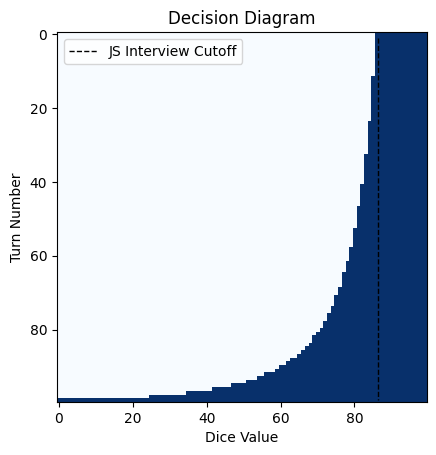

In [58]:
N, D = 100, 100
prof_js, cutoff = js_ex_prof(N, D, return_decision=True)
prof, decision_mat = dp_ex_profit(N, D, return_decision=True)
plt.imshow(decision_mat, cmap='Blues', label="Decision Boundary")
plt.vlines(D -cutoff +0.5, 1, N -1, linewidth=1, colors='black', linestyles='dashed', label="JS Interview Cutoff")
plt.title("Decision Diagram")
plt.xlabel("Dice Value")
plt.ylabel("Turn Number")
plt.legend(loc='upper left')
plt.savefig("decision_diagram.png")

In [27]:
PLOT_SIZE = 750 # 250

prof_diffs = np.zeros((PLOT_SIZE, PLOT_SIZE))
for n in tqdm(range(1, PLOT_SIZE +1)):
    for d in range(1, PLOT_SIZE +1):
        prof_diffs[n -1, d -1] = dp_ex_profit(n, d) -js_ex_prof(n, d)

100%|██████████| 750/750 [17:34<00:00,  1.41s/it]


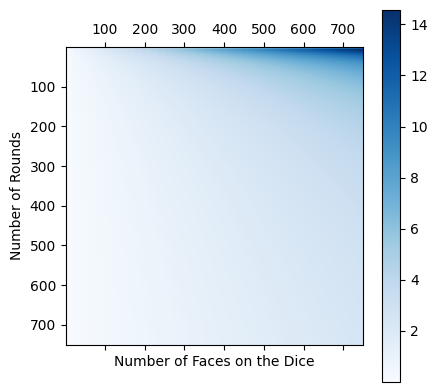

In [59]:
u, s, vh = np.linalg.svd(prof_diffs, full_matrices=False)
r1_appx = u @ np.diag(s*np.array([1] +[0]*(len(s) -1))) @ vh

plt.matshow(r1_appx, cmap="Blues", interpolation='none', extent=[1,PLOT_SIZE,PLOT_SIZE,1])
plt.colorbar()
plt.xlabel("Number of Faces on the Dice")
plt.ylabel("Number of Rounds")
plt.savefig("prof_diffs.png")

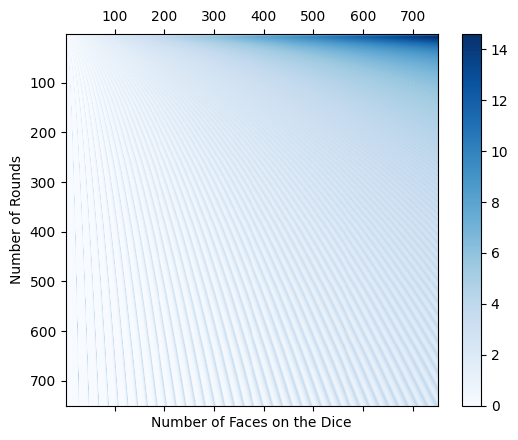

In [60]:
fig = plt.figure()
# fig = plt.figure(figsize=(10,10), dpi=216)
plt.matshow(prof_diffs, cmap="Blues", interpolation='none', extent=[1,PLOT_SIZE,PLOT_SIZE,1], fignum=fig.number)
plt.colorbar()
plt.xlabel("Number of Faces on the Dice")
plt.ylabel("Number of Rounds")
plt.savefig("prof_diffs_nonsmooth.png")

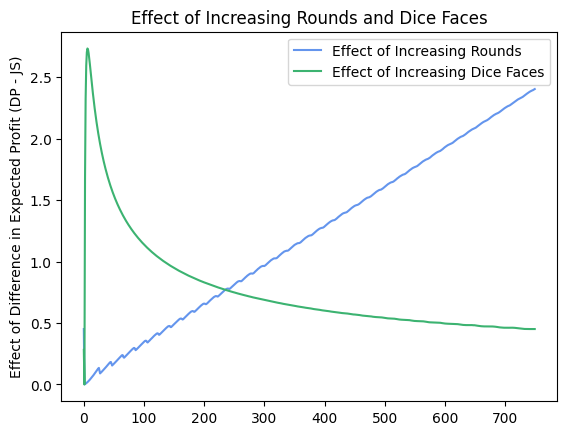

In [61]:
plt.plot(r1_appx[-1], label="Effect of Increasing Rounds", color='cornflowerblue')
plt.plot(r1_appx[:, 0], label="Effect of Increasing Dice Faces", color="mediumseagreen")
plt.legend(loc='upper right')
plt.ylabel("Effect of Difference in Expected Profit (DP - JS)")
plt.title("Effect of Increasing Rounds and Dice Faces")
plt.savefig("prof_diff_components.png")